In [ ]:
pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Dataset**

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 171MB/s]
100% 163M/163M [00:01<00:00, 146MB/s]


In [4]:
# Extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing Libraries**

In [6]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from PIL import Image

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:7])
print(with_mask_files[-7:])

['with_mask_3148.jpg', 'with_mask_183.jpg', 'with_mask_3289.jpg', 'with_mask_1238.jpg', 'with_mask_579.jpg', 'with_mask_247.jpg', 'with_mask_2164.jpg']
['with_mask_40.jpg', 'with_mask_675.jpg', 'with_mask_987.jpg', 'with_mask_609.jpg', 'with_mask_1946.jpg', 'with_mask_2300.jpg', 'with_mask_309.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:7])
print(without_mask_files[-7:])

['without_mask_3060.jpg', 'without_mask_3744.jpg', 'without_mask_1596.jpg', 'without_mask_62.jpg', 'without_mask_3680.jpg', 'without_mask_3034.jpg', 'without_mask_3237.jpg']
['without_mask_3628.jpg', 'without_mask_2410.jpg', 'without_mask_1292.jpg', 'without_mask_117.jpg', 'without_mask_2787.jpg', 'without_mask_1492.jpg', 'without_mask_2669.jpg']


**Labels for the class of Images**

In [9]:
## Creating the labels
with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)


With Mask == 1

Without Mask == 0

In [10]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Loading the Image**

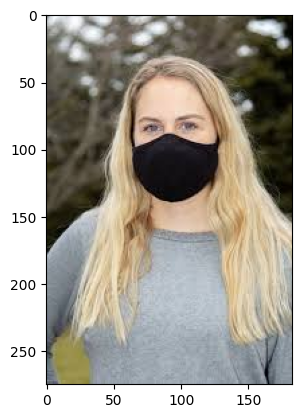

In [11]:
# Loading with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2517.jpg')
imgplot = plt.imshow(img)
plt.show()

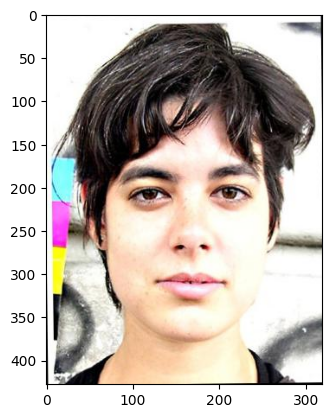

In [12]:
# Loading without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1350.jpg')
imgplot = plt.imshow(img)
plt.show()

**Processing Image**

1. Resizing Images
2. Converting images to numpy arrays

In [13]:
# Converting images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
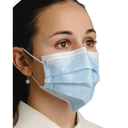

In [14]:
data[0]

In [15]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [16]:
type(X)
type(Y)

numpy.ndarray

In [17]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Training Data & Testing Data Split**

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [20]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[138, 127, 133],
        [124, 113, 119],
        [101,  90,  96],
        ...,
        [ 22,  44,  23],
        [ 19,  41,  20],
        [ 16,  37,  18]],

       [[109,  98, 104],
        [100,  89,  95],
        [ 86,  75,  81],
        ...,
        [ 23,  45,  23],
        [ 20,  42,  21],
        [ 17,  38,  19]],

       [[ 88,  77,  83],
        [ 84,  73,  79],
        [ 77,  66,  72],
        ...,
        [ 24,  46,  25],
        [ 21,  43,  22],
        [ 19,  40,  21]],

       ...,

       [[188, 171, 152],
        [189, 173, 151],
        [190, 172, 152],
        ...,
        [243, 245, 245],
        [239, 241, 242],
        [235, 237, 237]],

       [[182, 166, 152],
        [187, 171, 156],
        [193, 175, 161],
        ...,
        [233, 237, 242],
        [229, 232, 238],
        [226, 229, 235]],

       [[171, 155, 142],
        [179, 163, 150],
        [189, 171, 158],
        ...,
        [219, 223, 232],
        [211, 216, 225],
        [205, 210, 218]]], dtype=uint8)
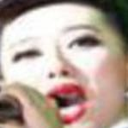

In [21]:
X_train[0]

In [22]:
X_train_scaled[0]

array([[[0.54117647, 0.49803922, 0.52156863],
        [0.48627451, 0.44313725, 0.46666667],
        [0.39607843, 0.35294118, 0.37647059],
        ...,
        [0.08627451, 0.17254902, 0.09019608],
        [0.0745098 , 0.16078431, 0.07843137],
        [0.0627451 , 0.14509804, 0.07058824]],

       [[0.42745098, 0.38431373, 0.40784314],
        [0.39215686, 0.34901961, 0.37254902],
        [0.3372549 , 0.29411765, 0.31764706],
        ...,
        [0.09019608, 0.17647059, 0.09019608],
        [0.07843137, 0.16470588, 0.08235294],
        [0.06666667, 0.14901961, 0.0745098 ]],

       [[0.34509804, 0.30196078, 0.3254902 ],
        [0.32941176, 0.28627451, 0.30980392],
        [0.30196078, 0.25882353, 0.28235294],
        ...,
        [0.09411765, 0.18039216, 0.09803922],
        [0.08235294, 0.16862745, 0.08627451],
        [0.0745098 , 0.15686275, 0.08235294]],

       ...,

       [[0.7372549 , 0.67058824, 0.59607843],
        [0.74117647, 0.67843137, 0.59215686],
        [0.74509804, 0

**Building a Convolutional Neural Networks (CNN)**

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [25]:
# Compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [26]:
# Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=15)

Epoch 1/15
170/170 [==============================] - 137s 801ms/step - loss: 0.4987 - acc: 0.7679 - val_loss: 0.2614 - val_acc: 0.8959
Epoch 2/15
170/170 [==============================] - 131s 774ms/step - loss: 0.2913 - acc: 0.8878 - val_loss: 0.2263 - val_acc: 0.9091
Epoch 3/15
170/170 [==============================] - 131s 768ms/step - loss: 0.2345 - acc: 0.9060 - val_loss: 0.2059 - val_acc: 0.9190
Epoch 4/15
170/170 [==============================] - 132s 775ms/step - loss: 0.1812 - acc: 0.9285 - val_loss: 0.2120 - val_acc: 0.9207
Epoch 5/15
170/170 [==============================] - 132s 779ms/step - loss: 0.1710 - acc: 0.9342 - val_loss: 0.2607 - val_acc: 0.9074
Epoch 6/15
170/170 [==============================] - 133s 782ms/step - loss: 0.1495 - acc: 0.9424 - val_loss: 0.2060 - val_acc: 0.9289
Epoch 7/15
170/170 [==============================] - 133s 781ms/step - loss: 0.1166 - acc: 0.9564 - val_loss: 0.2341 - val_acc: 0.9256
Epoch 8/15
170/170 [============================

**Model Evaluation**

In [27]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 13s 274ms/step - loss: 0.3846 - acc: 0.9298
Test Accuracy = 0.929847776889801


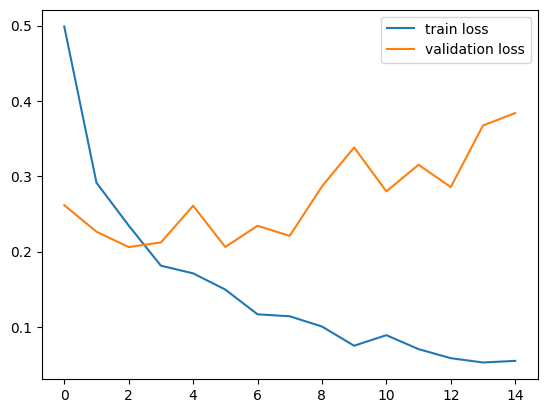

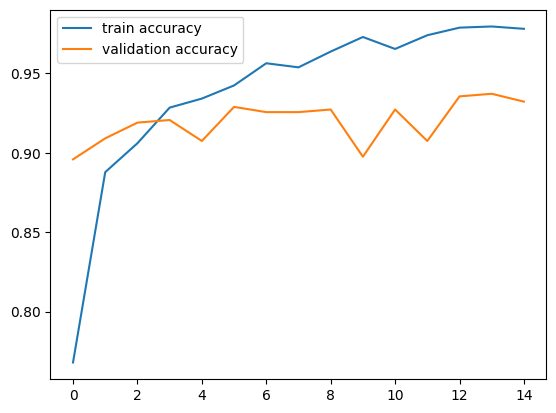

In [28]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test 1.jpg


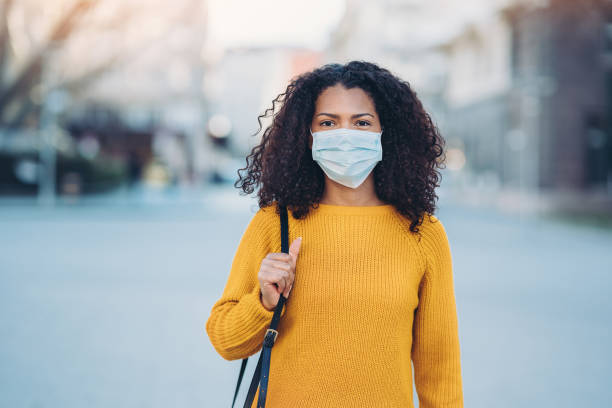

1/1 [==============================] - 0s 133ms/step
[[3.9274502e-07 1.0000000e+00]]
1
The person in the image is wearing a mask


In [30]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test 2.jpg


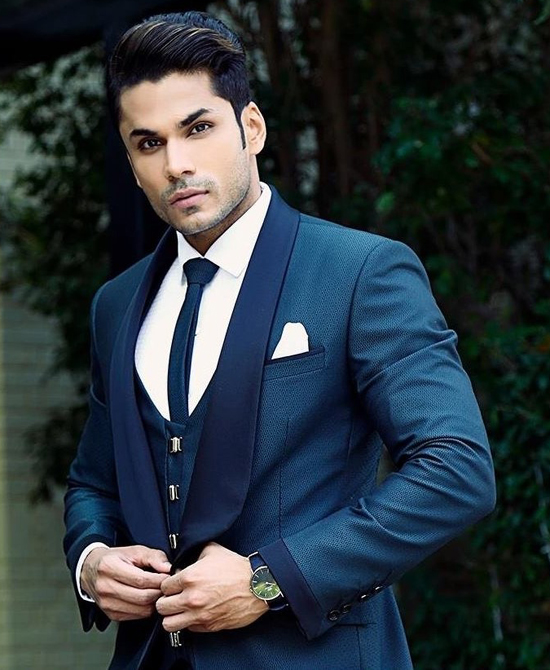

1/1 [==============================] - 0s 39ms/step
[[0.8049823 0.6638849]]
0
The person in the image is not wearing a mask


In [31]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')